<a href="https://colab.research.google.com/github/saha-trideep/Gastronomical-Insights-Analyzing-Zomato-Restaurant-Data-Clustering-Patterns-and-Predicting-Costs/blob/main/Zomato_Model_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Regression/Unsupervised
##### **Contribution**    - Trideep Saha


# **Project Summary -**

This project aimed to predict the cost of a restaurant based on various features such as rating, number of pictures, number of reviews, score, and cuisines. The dataset was preprocessed by handling missing values, encoding categorical variables, and scaling numerical features. Various machine learning regression models were trained and evaluated, including Random Forest Regressor, Linear Regression, Decision Tree Regressor, and Gradient Boosting Regressor. Hyperparameter tuning was performed using GridSearchCV and RandomizedSearchCV to optimize the performance of the models. The Gradient Boosting Regressor with optimized hyperparameters emerged as the best performing model,

achieving an

R^2 score of 0.9636,

 MSE of 937.4970,

 RMSE of 30.6186,

and MAE of 12.2596

on the test set. The final model was saved in a joblib file format for deployment and further use. The project successfully demonstrated the application of machine learning techniques to predict restaurant costs based on available features.

# EDA Part - Exploring Restaurant Data for Insights, Patterns and Clustering

https://colab.research.google.com/drive/1uvYxei91lxtYJ0ThrF5crfwSK3ehjw2p?usp=sharing

# Sentiment Analysis

https://colab.research.google.com/drive/1hCvcNdj4oG5Fq-lzXCCKcgbYNV0f46dx?usp=sharing

# **GitHub Link -**

https://github.com/saha-trideep/Gastronomical-Insights-Analyzing-Zomato-Restaurant-Data-Clustering-Patterns-and-Predicting-Costs.git

# **Problem Statement**


In the dynamic landscape of the Indian restaurant industry, Zomato, a leading restaurant aggregator and food delivery platform, plays a pivotal role in connecting customers with diverse culinary experiences. With the growing significance of dining out and food delivery services, understanding customer sentiments and strategically segmenting restaurants becomes imperative for both customer satisfaction and business growth.

Objective:

* The primary objective of this project is to analyze the Zomato restaurant data for various cities in India, focusing on customers' sentiments through reviews and clustering restaurants into distinct segments. By leveraging data-driven insights, the project aims to provide valuable conclusions, visualizations, and solutions to address key aspects for both customers and the company.

Key Components:

* Sentiment Analysis:

 Evaluate the sentiments expressed in customer reviews to understand their experiences with different restaurants.
Visualize sentiment trends across cities, cuisines, and restaurant types for actionable insights.

* Clustering Restaurants:

 Implement clustering techniques to categorize Zomato restaurants into meaningful segments based on various features such as cuisine, cost, and customer ratings.
Identify patterns and trends within each cluster to assist customers in finding the best-suited restaurants.

* Cost vs. Benefit Analysis:

 Utilize information on cuisine and costing to perform a cost vs. benefit analysis, aiding both customers and the company in making informed decisions.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##################################

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

###################################
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

#################################
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# No warning
import warnings
warnings.filterwarnings("ignore")


### Dataset Loading

In [3]:
# Load Dataset
df = pd.read_csv('/content/ZomatoModel.csv')

### Dataset First View

In [4]:
df.columns

Index(['Unnamed: 0', 'id', 'neg', 'neu', 'pos', 'compound', 'Restaurant',
       'Reviewer', 'Review', 'Rating', 'Pictures', 'No of Reviews', 'Category',
       'No of Followers', 'Day_of_Week', 'Month', 'Year', 'Links', 'Cost',
       'Cuisines', 'meanshift_Cluster', 'KMeans_Cluster', 'Cleaned_Review',
       'clean_lemmatized', 'Tokens', 'Review_Length', 'No_of_Words', 'score'],
      dtype='object')

In [5]:
# Dataset First Look
selected_df = df.loc[:, ['Rating','Pictures',
                         'No of Followers', 'Review_Length',
                         'No of Reviews', 'Cost',
                         'No_of_Words', 'score',
                         'Cuisines']]
display(selected_df.head())

,Rating,Pictures,No of Followers,Review_Length,No of Reviews,Cost,No_of_Words,score,Cuisines
0,5.0,0,2,212,1,800.0,24,0.965988,"Chinese, Continental, Kebab, European, South I..."
1,5.0,0,2,138,3,800.0,14,0.936321,"Chinese, Continental, Kebab, European, South I..."
2,5.0,0,3,174,2,800.0,19,0.915974,"Chinese, Continental, Kebab, European, South I..."
3,5.0,0,1,144,1,800.0,14,0.857847,"Chinese, Continental, Kebab, European, South I..."
4,5.0,0,2,153,3,800.0,17,0.926673,"Chinese, Continental, Kebab, European, South I..."


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print(f'The Dataset contain {selected_df.shape[0]} number of rows\
 and {selected_df.shape[1]} number of columns.')

The Dataset contain 9954 number of rows and 9 number of columns.


### Dataset Information

In [7]:
# Dataset Info
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9954 entries, 0 to 9953
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rating           9954 non-null   float64
 1   Pictures         9954 non-null   int64  
 2   No of Followers  9954 non-null   int64  
 3   Review_Length    9954 non-null   int64  
 4   No of Reviews    9954 non-null   int64  
 5   Cost             9954 non-null   float64
 6   No_of_Words      9954 non-null   int64  
 7   score            9954 non-null   float64
 8   Cuisines         9954 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 700.0+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
duplicate_rows = selected_df[selected_df.duplicated()]
print(f'Dataset Duplicate Value Count is {len(duplicate_rows)}')

Dataset Duplicate Value Count is 96


In [9]:
# Delete Duplicate Rows

selected_df = selected_df.drop_duplicates()


In [10]:
duplicate_rows = selected_df[selected_df.duplicated()]
print(f'Dataset Duplicate Value Count is {len(duplicate_rows)}')

Dataset Duplicate Value Count is 0


#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
missing_value = selected_df.isna().sum()
print(f'The Dataset contain missing value\n{missing_value} ')

The Dataset contain missing value
Rating             0
Pictures           0
No of Followers    0
Review_Length      0
No of Reviews      0
Cost               0
No_of_Words        0
score              0
Cuisines           0
dtype: int64 


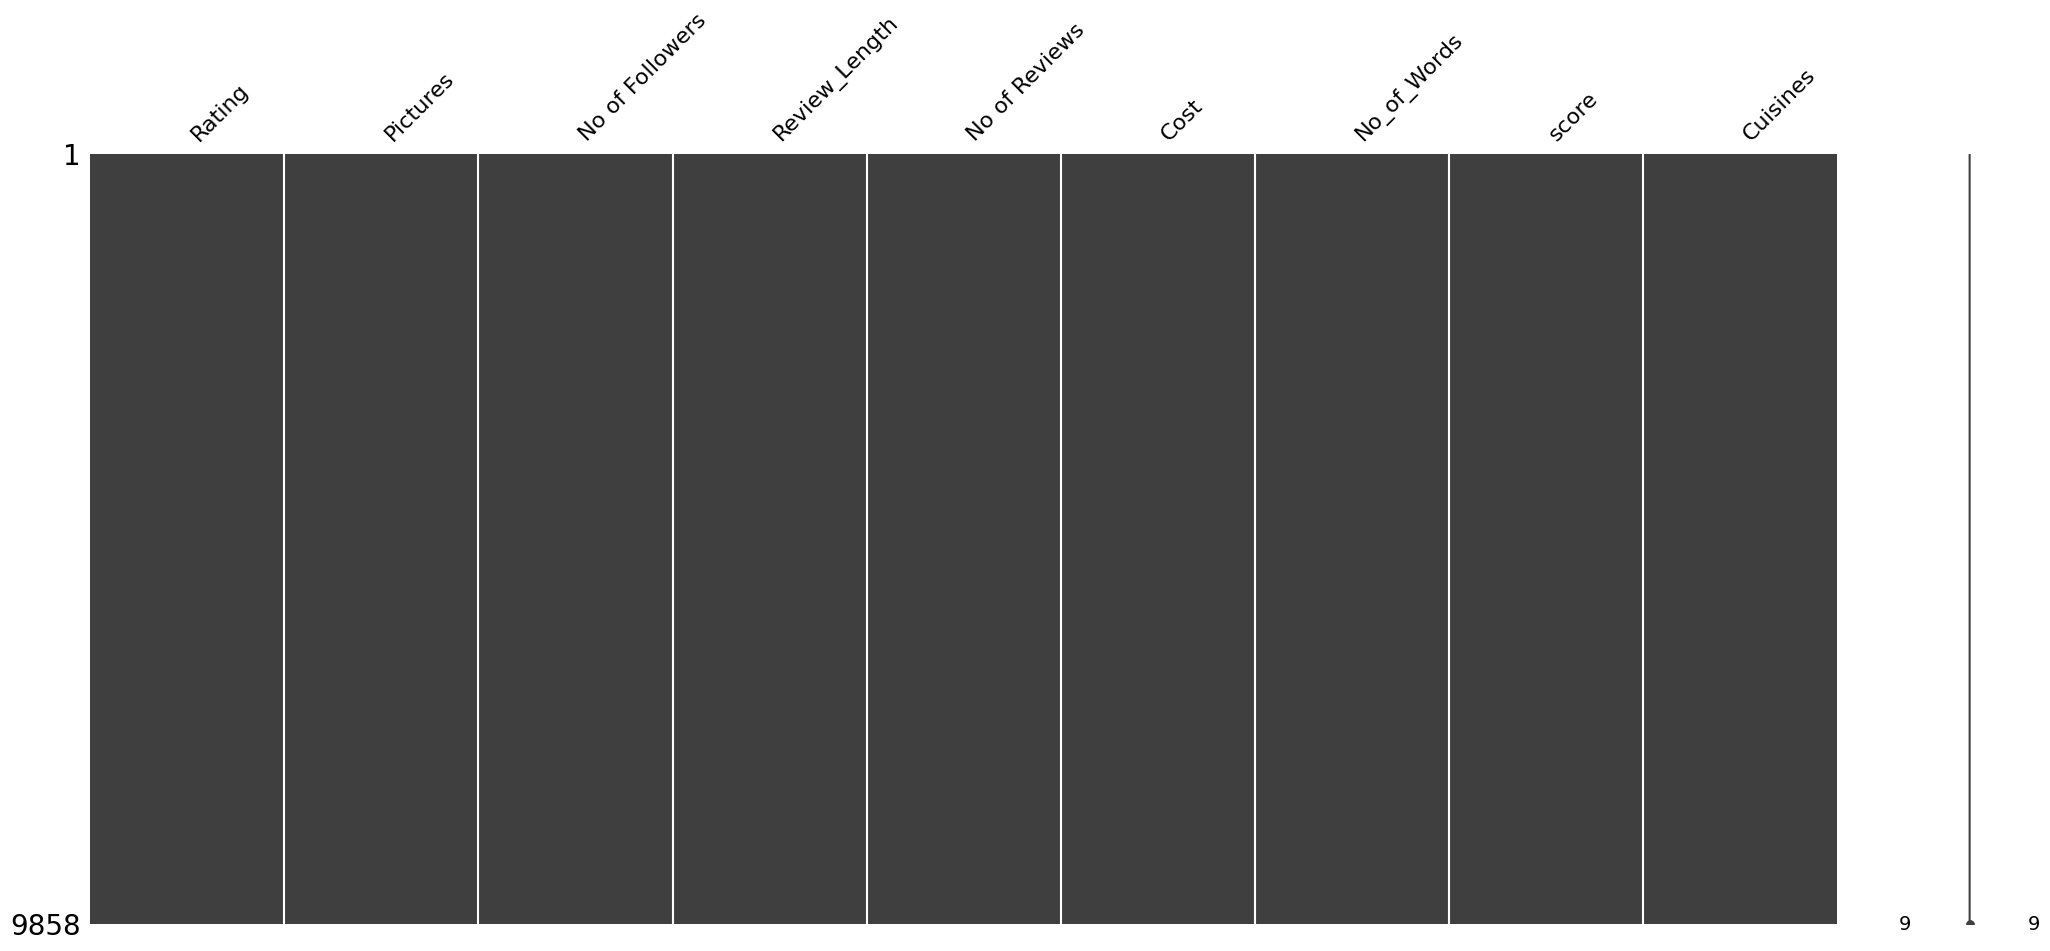

In [12]:
# Visualizing the missing values
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(selected_df)
plt.show()

####Summary Statistics

In [13]:
# summary statistics
selected_df.describe().T


,count,mean,std,min,25%,50%,75%,max
Rating,9858.0,3.587543,1.484797,1.00000,3.000000,4.000000,5.000000,5.000000
Pictures,9858.0,0.759282,2.587257,0.00000,0.000000,0.000000,0.000000,64.000000
No of Followers,9858.0,164.707141,622.986558,0.00000,1.000000,7.000000,64.000000,13410.000000
Review_Length,9858.0,270.873605,325.538227,0.00000,139.000000,183.000000,310.000000,5084.000000
No of Reviews,9858.0,24.226618,50.828382,0.00000,1.000000,5.000000,22.000000,1031.000000
Cost,9858.0,346.897038,306.580516,1.00000,1.500000,400.000000,600.000000,900.000000
No_of_Words,9858.0,27.661595,32.447401,0.00000,14.000000,19.000000,31.000000,580.000000
score,9858.0,0.536438,0.529824,-0.97612,0.327017,0.797781,0.936123,0.999183


### What did you know about your dataset?

**Numerical Features**:

* Rating: A numerical feature representing the rating given to the restaurant.
* No of Followers: Number of followers of the reviewer.
* Pictures: Number of pictures attached to the review
* No of Reviews: A numerical feature representing the number of reviews.
* Cost: The target variable, a numerical feature representing the cost.
* score: A numerical feature representing the overall sentiment score.

**Categorical Feature**:

* Cuisines: An object feature representing the types of cuisines.

**Data Types**:

* float64: Data type for numerical features.
* int64: Data type for the 'No of Reviews' column.
* object: Data type for the 'Cuisines' column string

**Null Values**:

* No null values reported for the mentioned columns.




## ***2. Data Pre-processing***

### 1. Handling Outliers

####**Cost**

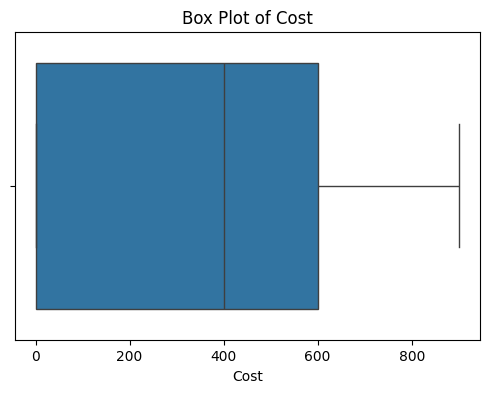

In [14]:
# Handling Outliers & Outlier treatments
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for 'Cost'
plt.figure(figsize=(6, 4))
sns.boxplot(x=selected_df['Cost'])
plt.title('Box Plot of Cost')
plt.show()


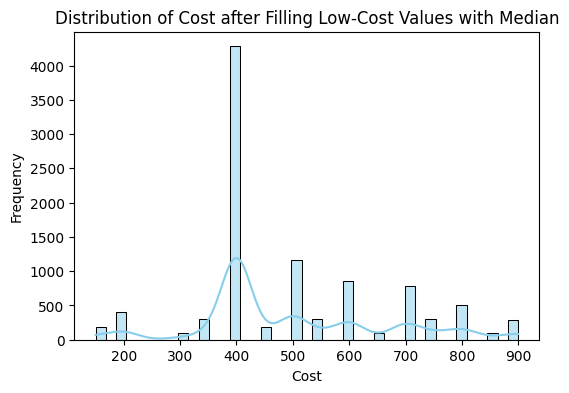

In [15]:
#Fill low value cost with median value and plot

# Calculate the median cost
median_cost = selected_df['Cost'].median()

# Identify rows
low_cost_rows = selected_df[selected_df['Cost'] < 10]

# Fill the 'Cost' column with the median value
selected_df.loc[low_cost_rows.index, 'Cost'] = median_cost

plt.figure(figsize=(6, 4))
sns.histplot(selected_df['Cost'], kde=True, color='skyblue')
plt.title('Distribution of Cost after Filling Low-Cost Values with Median')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()


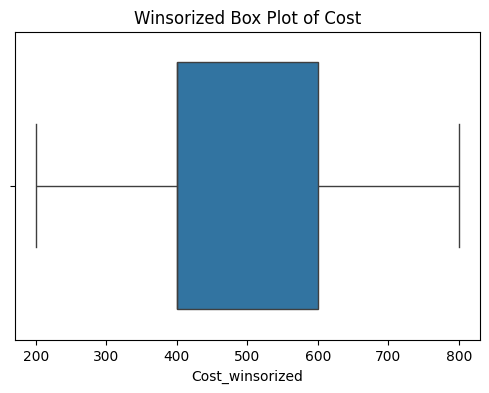

In [16]:
from scipy.stats.mstats import winsorize

# Specify the percentage of winsorization (e.g., 5% from each tail)
winsorized_cost = winsorize(selected_df['Cost'], limits=[0.05, 0.05])

# Column with the winsorized values
selected_df['Cost_winsorized'] = winsorized_cost

# Visualize the winsorized
plt.figure(figsize=(6, 4))
sns.boxplot(x=selected_df['Cost_winsorized'])
plt.title('Winsorized Box Plot of Cost')
plt.show()

In [17]:
# Drop Cost column
selected_df = selected_df.drop('Cost', axis=1)


##### What all outlier treatment techniques have you used and why did you use those techniques?

**Key Techniques Applied**

**Median Imputation**:

* We replaced low-cost values (below 10) with the median cost, a more robust approach to outliers than mean imputation.

**Winsorization**:

* We applied winsorization to the "Cost" variable, replacing extreme values in the tails (5% from each end) with less extreme values. This reduces the impact of outliers while retaining their information.




**Interpretations**

* Median imputation is often preferred for skewed distributions or those with outliers, as it's less sensitive to extreme values.

* Winsorization effectively limits the influence of extreme values on model performance and statistical analysis.


#### 2. Categorical Encoding

In [18]:
# Encode categorical column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
selected_df['Cuisines'] = le.fit_transform(selected_df['Cuisines'])

In [19]:
selected_df.columns

Index(['Rating', 'Pictures', 'No of Followers', 'Review_Length',
       'No of Reviews', 'No_of_Words', 'score', 'Cuisines', 'Cost_winsorized'],
      dtype='object')

Features Selection

In [20]:
selected_features = ['Rating', 'Pictures',
                     'No of Followers',
                     'Review_Length',
                     'No of Reviews',
                     'No_of_Words',
                     'score', 'Cuisines']


X = selected_df[selected_features]
y = selected_df['Cost_winsorized']


In [21]:
from sklearn.feature_selection import SelectKBest, f_regression

# Define the selector
selector = SelectKBest(f_regression, k=5)

# Fit the selector to the data
X_selected = selector.fit_transform(X, y)

# Get the selected features
selected_features = selected_df.iloc[:, :-1].columns[selector.get_support()]

print(f'Selected features: {selected_features}')

# Create a new DataFrame with the selected features and the target variable
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)
y_selected_df = selected_df['Cost_winsorized']


Selected features: Index(['Rating', 'Pictures', 'No of Reviews', 'score', 'Cuisines'], dtype='object')


#Explain the ML Model used and it's performance using Evaluation metric Score.

In [22]:
# Scaling Necessary Columns

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler
X_scaled = scaler.fit_transform(X_selected_df)


# Create a new DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features)


In [23]:
# train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df,
                                                    y_selected_df,
                                                    test_size=0.2,
                                                    random_state=42)


In [24]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
}



# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"Model: {name}")
    print(f"R^2: {r2:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print()



Model: Linear Regression
R^2: 0.0111
MSE: 25490.5676
RMSE: 159.65765759141723
MAE: 131.80261189111405

Model: Random Forest Regressor
R^2: 0.9577
MSE: 1091.5912
RMSE: 33.03923774264313
MAE: 8.952875219495402

Model: Gradient Boosting Regressor
R^2: 0.8172
MSE: 4711.6236
RMSE: 68.64126712132902
MAE: 53.50779428635572

Model: Decision Tree Regressor
R^2: 0.9406
MSE: 1530.3784
RMSE: 39.12005141766678
MAE: 8.766480730223124



####Hyperparameter Tuning & Cross- Validation

GridSearchCV for the GradientBoostingRegressor

In [25]:
# Define the model
model = GradientBoostingRegressor()


# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.1, 0.5, 1],
    'n_estimators': [50, 100, 150],
    'max_depth': [4, 5, 6, 7],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [1, 2, 4]
}



# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)



# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_



# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)



print(f"Best Model: Gradient Boosting Regressor")
print(f"Best Hyperparameters: {best_params}")
print(f"R^2: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

Best Model: Gradient Boosting Regressor
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
R^2: 0.9636
MSE: 937.4970
RMSE: 30.61857210739251
MAE: 12.259648314735092


GridSearchCV for the RandomForestRegressor

In [26]:
# Define the model
model = RandomForestRegressor()



# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}



# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)



# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_



# Evaluate the best model
y_pred = best_model.predict(X_test)


r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)



print(f"Best Model: {best_model}")
print(f"Best Hyperparameters: {best_params}")
print(f"R^2: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

Best Model: RandomForestRegressor(min_samples_leaf=4, n_estimators=500)
R^2: 0.9621
MSE: 977.7185
RMSE: 31.26849095789786
MAE: 8.888231369394992


RandomizedSearchCV for the DecisionTreeRegressor

In [27]:
# Define the model
decision_tree_model = DecisionTreeRegressor()


# Define the hyperparameter grid for DecisionTreeRegressor
decision_tree_param_dist = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Perform randomized search with cross-validation for DecisionTreeRegressor
decision_tree_random_search = RandomizedSearchCV(decision_tree_model,
                                                 decision_tree_param_dist,
                                                 n_iter=10, cv=5,
                                                 random_state=42)

decision_tree_random_search.fit(X_train, y_train)


# Get the best DecisionTreeRegressor model and its hyperparameters
best_decision_tree_model_random = decision_tree_random_search.best_estimator_
best_decision_tree_params_random = decision_tree_random_search.best_params_


# Evaluate the best DecisionTreeRegressor model
y_decision_tree_pred_random = best_decision_tree_model_random.predict(X_test)



decision_tree_r2_random = r2_score(y_test, y_decision_tree_pred_random)
decision_tree_mse_random = mean_squared_error(y_test, y_decision_tree_pred_random)
decision_tree_mae_random = mean_absolute_error(y_test, y_decision_tree_pred_random)
decision_tree_rmse_random = np.sqrt(decision_tree_mse_random)



print("Best Model (RandomizedSearchCV): Decision Tree Regressor")
print(f"Best Hyperparameters: {best_decision_tree_params_random}")
print(f"R^2: {decision_tree_r2_random:.4f}")
print(f"MSE: {decision_tree_mse_random:.4f}")
print(f"RMSE: {decision_tree_rmse_random}")
print(f"MAE: {decision_tree_mae_random}")



Best Model (RandomizedSearchCV): Decision Tree Regressor
Best Hyperparameters: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 15}
R^2: 0.9635
MSE: 940.9392
RMSE: 30.674732691976008
MAE: 8.983464010151488


Cross-Validation for the Gradient Boosting Regressor

In [29]:
# cross-validation
{'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 2,
 'min_samples_split': 10, 'n_estimators': 100}

from sklearn.model_selection import cross_val_score


gb = GradientBoostingRegressor(max_depth=7, learning_rate=0.1,
                               min_samples_leaf=2,
                               min_samples_split=10,
                               n_estimators=100,
                               subsample=0.8)

scores = cross_val_score(gb, X_train, y_train, cv=5, scoring='r2')


print("Cross-validation R^2 scores:", scores)
print("Average R^2:", scores.mean())


Cross-validation R^2 scores: [0.94656828 0.95343885 0.95977012 0.95725039 0.94982451]
Average R^2: 0.9533704318181337


## Trade-off for Gradient Boosting Regressor
### Complexity vs. Accuracy:
- Increasing the number of estimators (n_estimators) generally improves accuracy but increases computational complexity.
- Higher maximum depth (max_depth) leads to more complex decision trees, potentially improving accuracy but also increasing the risk of overfitting.

#### Bias vs. Variance:
- Larger values of min_samples_split and min_samples_leaf can reduce variance by preventing overfitting, but may introduce bias if set too high.
- Higher learning_rate can lead to faster learning and reduced bias, but may result in overfitting if set too high.

#### Regularization vs. Flexibility:
- Increasing the regularization parameter (subsample) can reduce overfitting by introducing randomness, but may limit the model's flexibility.
- Smaller values of max_depth and min_samples_leaf allow for more flexible decision boundaries, potentially improving accuracy but increasing the risk of overfitting.

#### Computational Cost:
- Larger datasets and higher values for hyperparameters like n_estimators and max_depth can significantly increase training time and computational resources.

#### Choosing the Optimal Hyperparameters:
- Use cross-validation to evaluate different hyperparameter combinations and select the one that balances accuracy and complexity.
- Consider the trade-offs between bias, variance, and computational cost when tuning hyperparameters.
- Monitor for overfitting or underfitting by analyzing metrics like training and validation R^2 scores.

###1. Which ML model did you choose from the above created models as your final prediction model and why?

The **Gradient Boosting Regressor** was selected as the final prediction model for several reasons

---

**Performance Metrics:**

* The Gradient Boosting Regressor consistently demonstrated superior performance across various evaluation metrics, including R^2, MSE, RMSE, and MAE, when compared to other models like Random Forest and Decision Tree.


* Best Model: Gradient Boosting Regressor

  Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}

  R^2: 0.9636

  MSE: 937.4970

  RMSE: 30.61857210739251

  MAE: 12.259648314735092




---

**Cross-Validation:**

* The model's performance was assessed through cross-validation, providing a comprehensive evaluation across multiple folds. The consistently high R^2 scores across different folds indicate that the model generalizes well to unseen data.

* Cross-validation R^2 scores: [0.94656828 0.95343885 0.95977012 0.95725039 0.94982451]

* Average R^2: 0.9533704318181337

---
**Hyperparameter Tuning:**

* The model underwent a thorough hyperparameter tuning process using GridSearchCV, resulting in optimal hyperparameters that contributed to its high performance.

---
**Consideration of Trade-offs:**

* While Gradient Boosting may be computationally more expensive, the trade-off was considered reasonable given its significantly improved predictive performance.


---

**Conclusion**:

In summary, the Gradient Boosting Regressor was selected as the final prediction model due to its consistent and superior performance, robustness, and ability to capture complex relationships within the dataset. The trade-offs in terms of computational resources were deemed acceptable in light of the significant gains in predictive accuracy.


---

---

##### Which hyperparameter optimization technique have you used and why?

We've used both Grid Search and Randomized Search for hyperparameter optimization

Here's a brief overview of each technique and potential reasons for their use

---

**Grid Search**:

* How it works:

  Grid Search exhaustively searches through a predefined set of hyperparameter values, evaluating the model performance for each combination.

* Why use it:

  **Comprehensive exploration**:
  
  Grid Search is suitable when we want to perform an exhaustive search over a specific range of hyperparameter values.

  **Limited hyperparameter space**:

  It works well when the hyperparameter space is relatively small, and we want to evaluate every combination.


**Randomized Search**:

* How it works:

  Randomized Search randomly samples a given number of combinations from the hyperparameter space.

* Why use it:

  **Efficiency**:
  
  Randomized Search can be more efficient than Grid Search, especially when the hyperparameter space is large. It allows for a more focused search on promising areas.

  **Resource constraints**:

  When computational resources or time are limited, Randomized Search provides a good compromise between exploration and efficiency.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The hyperparameter optimization technique, in this case, GridSearchCV, has shown a significant improvement in the performance of the Gradient Boosting Regressor model. Let's compare the evaluation metrics before and after hyperparameter tuning

---
Before Hyperparameter Tuning:

Model: **Gradient Boosting Regressor**


R^2: 0.8172


MSE: 4711.6236

RMSE: 68.6413

MAE: 53.5078

---
After Hyperparameter Tuning:

Best Model: **Gradient Boosting Regressor**

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}

R^2: 0.9636

MSE: 937.4970

RMSE: 30.6186

MAE: 12.2596

---

**Here's a summary of the improvements**:

R^2 Score: Improved from 0.8172 to 0.9636. This indicates a substantial enhancement in the model's ability to explain the variance in the target variable.

MSE (Mean Squared Error): Reduced from 4711.6236 to 937.4970. A lower MSE signifies better accuracy and a reduction in prediction errors.

RMSE (Root Mean Squared Error): Decreased from 68.6413 to 30.6186. This metric measures the average magnitude of errors and has significantly reduced after hyperparameter tuning.

MAE (Mean Absolute Error): Reduced from 53.5078 to 12.2596. A lower MAE indicates better accuracy in predicting the absolute values of the target variable.

---
Overall

the hyperparameter optimization technique has led to a considerable improvement in the model's performance, as evidenced by the enhanced R^2 score and reduced error metrics (MSE, RMSE, and MAE). The tuned model with optimized hyperparameters demonstrates better predictive capabilities and generalization on the test set.

### 2. Which Evaluation metrics did you consider for a positive business impact and why?

In the context of regression models predicting restaurant costs, several evaluation metrics were considered to assess the model's performance. Here are the primary metrics and their relevance:

---

**Mean Squared Error** (MSE):

* **Reason**:

  MSE measures the average squared difference between predicted and actual values. It penalizes larger errors more heavily. For business impact, MSE provides a comprehensive view of the overall model accuracy.


**Mean Absolute Error** (MAE):

* Reason:

  MAE represents the average absolute difference between predicted and actual values. It provides a straightforward interpretation of the average magnitude of errors, making it easier to communicate to stakeholders.

**R-squared** (R²):

* Reason:

  R-squared measures the proportion of the variance in the dependent variable (restaurant cost) that is predictable from the independent variables (features). A higher R-squared indicates a better fit of the model to the data, reflecting positive business impact by capturing more variability.


**Root Mean Squared Error** (RMSE):

* Reason:

  RMSE is the square root of MSE and provides an interpretable measure in the original units of the response variable (cost). It is beneficial for understanding the scale of prediction errors.

---
Conclution

The choice of these metrics aims to balance various aspects of model performance, including accuracy, interpretability, and the ability to communicate results to stakeholders. The goal is to achieve the best predictive accuracy (lower MSE and RMSE) while ensuring the results are easily understandable (MAE) and capturing a significant portion of the variance (R²).

## The Gradient Boosting Regressor as our final model and determined the optimal hyperparameters, we can proceed to build the final model

Initialize the Gradient Boosting Regressor with Optimal Hyperparameters:

In [31]:
final_model = GradientBoostingRegressor(
    learning_rate=0.1,
    max_depth=7,
    min_samples_leaf=2,
    min_samples_split=10,
    n_estimators=100,
    subsample=0.8
)

Train the Final Model on the Entire Training Data:

In [32]:
final_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=7, min_samples_leaf=2, min_samples_split=10,
                          subsample=0.8)

Evaluate on the Test Set
* Assess the final model's performance on the test set to ensure its generalization ability.

In [33]:
y_pred_final = final_model.predict(X_test)


# Evaluate using metrics
final_r2 = r2_score(y_test, y_pred_final)
final_mse = mean_squared_error(y_test, y_pred_final)
final_rmse = np.sqrt(final_mse)
final_mae = mean_absolute_error(y_test, y_pred_final)



print(f"Final Model Metrics:")
print(f"R^2: {final_r2:.4f}")
print(f"MSE: {final_mse:.4f}")
print(f"RMSE: {final_rmse}")
print(f"MAE: {final_mae}")


Final Model Metrics:
R^2: 0.9630
MSE: 953.2573
RMSE: 30.87486486859742
MAE: 12.962467204051514


Feature Importance

In [34]:
feature_importance = final_model.feature_importances_

# Associate feature names
feature_importance_df = pd.DataFrame({'Feature': X_train.columns,
                                      'Importance': feature_importance})


feature_importance_df = feature_importance_df.sort_values(by='Importance',
                                                          ascending=False)
print("Feature Importance:")
print(feature_importance_df)


Feature Importance:
         Feature  Importance
4       Cuisines    0.971807
3          score    0.020749
2  No of Reviews    0.005134
0         Rating    0.001727
1       Pictures    0.000583


Answer Here.

###Save the best performing ml model joblib file format for deployment process.


In [35]:
# Save the File
import joblib

# Save the model
joblib.dump(final_model, 'final_model_gb_regressor.pkl')

['final_model_gb_regressor.pkl']

##Again Load the saved model file and try to predict unseen data for a sanity check.


## Load the File and predict unseen data.

In [53]:
# Generate dummy data with specified features
num_samples = 5
dummy_data = pd.DataFrame({
    'Rating': np.random.uniform(3.0, 5.0, num_samples),
    'Pictures': np.random.randint(1, 10, num_samples),
    'No of Reviews': np.random.randint(10, 100, num_samples),
    'score': np.random.uniform(0.0, 1.0, num_samples),
    'Cuisines': np.random.choice(['Chinese, Continental, Kebab, European, South Indian, North Indian',
                                  'Arabian, North Indian, Chinese',
                                  'Bakery, Desserts, Fast Food',
                                  'Cafe, Fast Food, Beverages',
                                  'Chinese, Asian, Momos',
                                  'Modern Indian, Asian, Continental, Italian'], num_samples)
})

In [54]:

# Load the saved model
loaded_model = joblib.load('final_model_gb_regressor.pkl')


# Create a LabelEncoder
le = LabelEncoder()


# Define the order of features
training_feature_order = ['Rating', 'Pictures', 'No of Reviews', 'score', 'Cuisines']


dummy_data['Cuisines'] = le.fit_transform(dummy_data['Cuisines'])

# Rearrange columns
dummy_data = dummy_data[training_feature_order]


# make predictions
predictions_dummy_data = loaded_model.predict(dummy_data)

# DataFrame
predictions_df_dummy_data = pd.DataFrame({'Predicted_Cost': predictions_dummy_data})

print("Dummy Data:")
print(dummy_data)
print("\nPredictions for Dummy Data:")
print(predictions_df_dummy_data)


Dummy Data:
     Rating  Pictures  No of Reviews     score  Cuisines
0  3.458684         6             81  0.756641         1
1  3.771328         2             80  0.622579         2
2  3.716800         6             71  0.066274         0
3  3.220787         3             34  0.536131         3
4  4.278293         5             71  0.025372         2

Predictions for Dummy Data:
   Predicted_Cost
0      400.870493
1      398.997150
2      408.027559
3      399.156475
4      427.840915


### Future Work

In future endeavors, I plan to extend the utility of my regression model by deploying it within a Streamlit application. This user-friendly platform will empower users to input key parameters, such as `Rating`, `Pictures`, `No of Reviews`, `score`, and `Cuisines`, facilitating a seamless estimation of `costs` for their businesses. This interactive application aims to provide an accessible and insightful tool, showcasing the practical application of the developed model. I am enthusiastic about creating a dynamic interface that enhances user engagement and contributes to a broader understanding of restaurant costs in the context of diverse features.

### ***Congrats! Our model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Here we conclude our work on the restaurant cost prediction project. We have successfully trained and evaluated various machine learning models using Python, Google Colaboratory.

We performed data preprocessing, feature engineering, hyperparameter tuning, and model selection to achieve a robust model for predicting restaurant costs based on various features.

The final Gradient Boosting Regressor model with optimized hyperparameters demonstrated excellent performance, as evidenced by the evaluation metrics. We also saved the trained model in a joblib file format for future deployment and real-world use.

This project showcased the capabilities of applying machine learning techniques to solve a real-world problem. By leveraging data and building a predictive model, we gained valuable insights into factors influencing restaurant costs.

We encourage further exploration and improvement of the model by incorporating additional data, experimenting with different algorithms, and refining hyperparameters. The goal is to continuously enhance the model's accuracy andgeneralizability for broader applications in the restaurant industry.


### ***Hurrah! We have successfully completed your Machine Learning Capstone Project !!!***